<a href="https://colab.research.google.com/github/ShuimuZeng/COMP338/blob/main/CNNonFashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This program is runned on the google colab T4 free gpu

In [3]:
loader = keras.datasets.fashion_mnist.load_data
(x_train, y_train), (x_test, y_test) = loader()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = {0: 'T-shirt/top', 1: 'Trouser',
 2: 'Pullover', 3: 'Dress', 4: 'Coat',
 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
 8: 'Bag', 9: 'Ankle boot'}
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

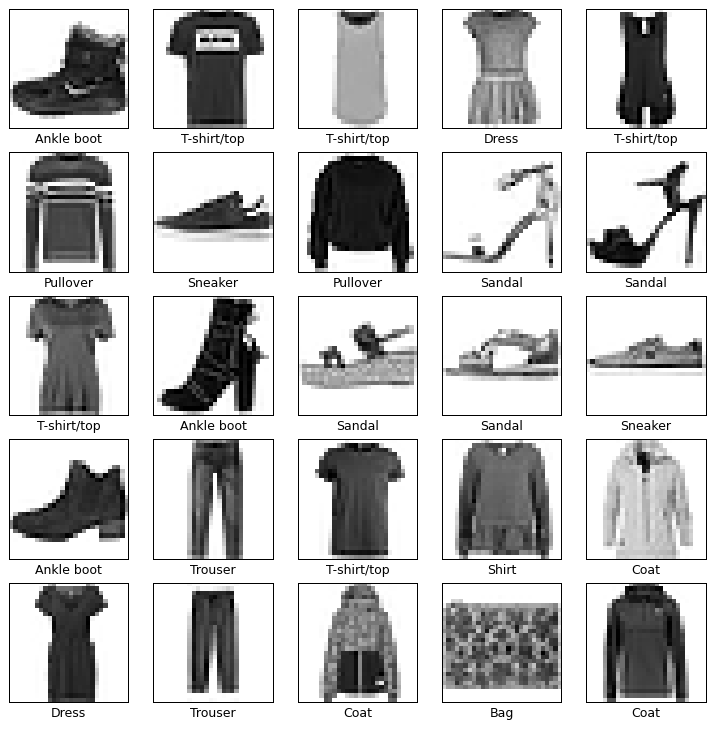

In [5]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.imshow(x_train[i], cmap=plt.cm.binary)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
num_classes = 10
x_train = (x_train / 510.).reshape(-1, 28, 28, 1)
x_test = (x_test / 510.).reshape(-1, 28, 28, 1)

In [7]:
model = keras.models.Sequential()

In [8]:
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32,
 kernel_size=(3, 3),
 activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3),
activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
# model.add(keras.layers.AveragePooling2D(pool_size=(4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(num_classes,
activation='softmax'))

In [9]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['acc'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                73760     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [15]:
print(x_train.shape)
print(x_train[0])
print(x_train[0].shape)

(60000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  

In [16]:
trainmodel=model.fit(x_train, y_train,
 batch_size=64,
 epochs=20,
 verbose=1,
 validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 10s 6ms/step - loss: 0.6155 - acc: 0.7796 - val_loss: 0.3754 - val_acc: 0.8648
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3900 - acc: 0.8586 - val_loss: 0.3192 - val_acc: 0.8826
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3456 - acc: 0.8750 - val_loss: 0.2952 - val_acc: 0.8906
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3146 - acc: 0.8889 - val_loss: 0.2825 - val_acc: 0.8967
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2922 - acc: 0.8931 - val_loss: 0.2662 - val_acc: 0.9032
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2736 - acc: 0.9001 - val_loss: 0.2558 - val_acc: 0.9035
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2547 - acc: 0.9063 - val_loss: 0.2411 - val_acc: 0.9109
Epoch 8/20
750/750 [==============================] - 4s 6ms/step - loss: 0

In [17]:
score = model.evaluate(x_test, y_test, verbose=1)
print(f'Accuracy on test set: {score[1]:0.3}')


313/313 [==============================] - 1s 3ms/step - loss: 0.2710 - acc: 0.9139
Accuracy on test set: 0.914


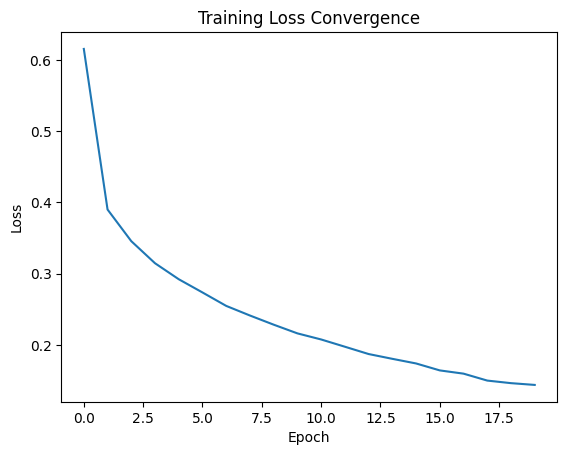

In [18]:
loss_history = trainmodel.history['loss']
plt.plot(loss_history)
plt.title('Training Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()